# **House Price Prediction**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
house = pd.read_csv('https://raw.githubusercontent.com/itsAkkil/House-Price-prediction-explaintiabilty/main/Housing.csv')


In [23]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
#changing values yes/no into 0/1
house['mainroad'] = house['mainroad'].map(
                   {'yes':1 ,'no':0})
house['guestroom'] = house['guestroom'].map(
                   {'yes':1 ,'no':0})
house['basement'] = house['basement'].map(
                   {'yes':1 ,'no':0})
house['airconditioning'] = house['airconditioning'].map(
                   {'yes':1 ,'no':0})
house['hotwaterheating'] = house['hotwaterheating'].map(
                   {'yes':1 ,'no':0})
house['prefarea'] = house['prefarea'].map(
                   {'yes':1 ,'no':0})

In [36]:
house.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [37]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [38]:
house.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [41]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [64]:
y = house['price']
# X = house[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
#        'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
#        'parking', 'prefarea']]

X = house[['area',  'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]

In [43]:
# explanatory model
import statsmodels.api as sm
print(sm.OLS(y,X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1064.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        17:24:58   Log-Likelihood:                         -8339.5
No. Observations:                 545   AIC:                                  1.670e+04
Df Residuals:                     534   BIC:                                  1.675e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [65]:
# explanatory model
import statsmodels.api as sm
print(sm.OLS(y,X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1168.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        17:48:19   Log-Likelihood:                         -8340.4
No. Observations:                 545   AIC:                                  1.670e+04
Df Residuals:                     535   BIC:                                  1.674e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

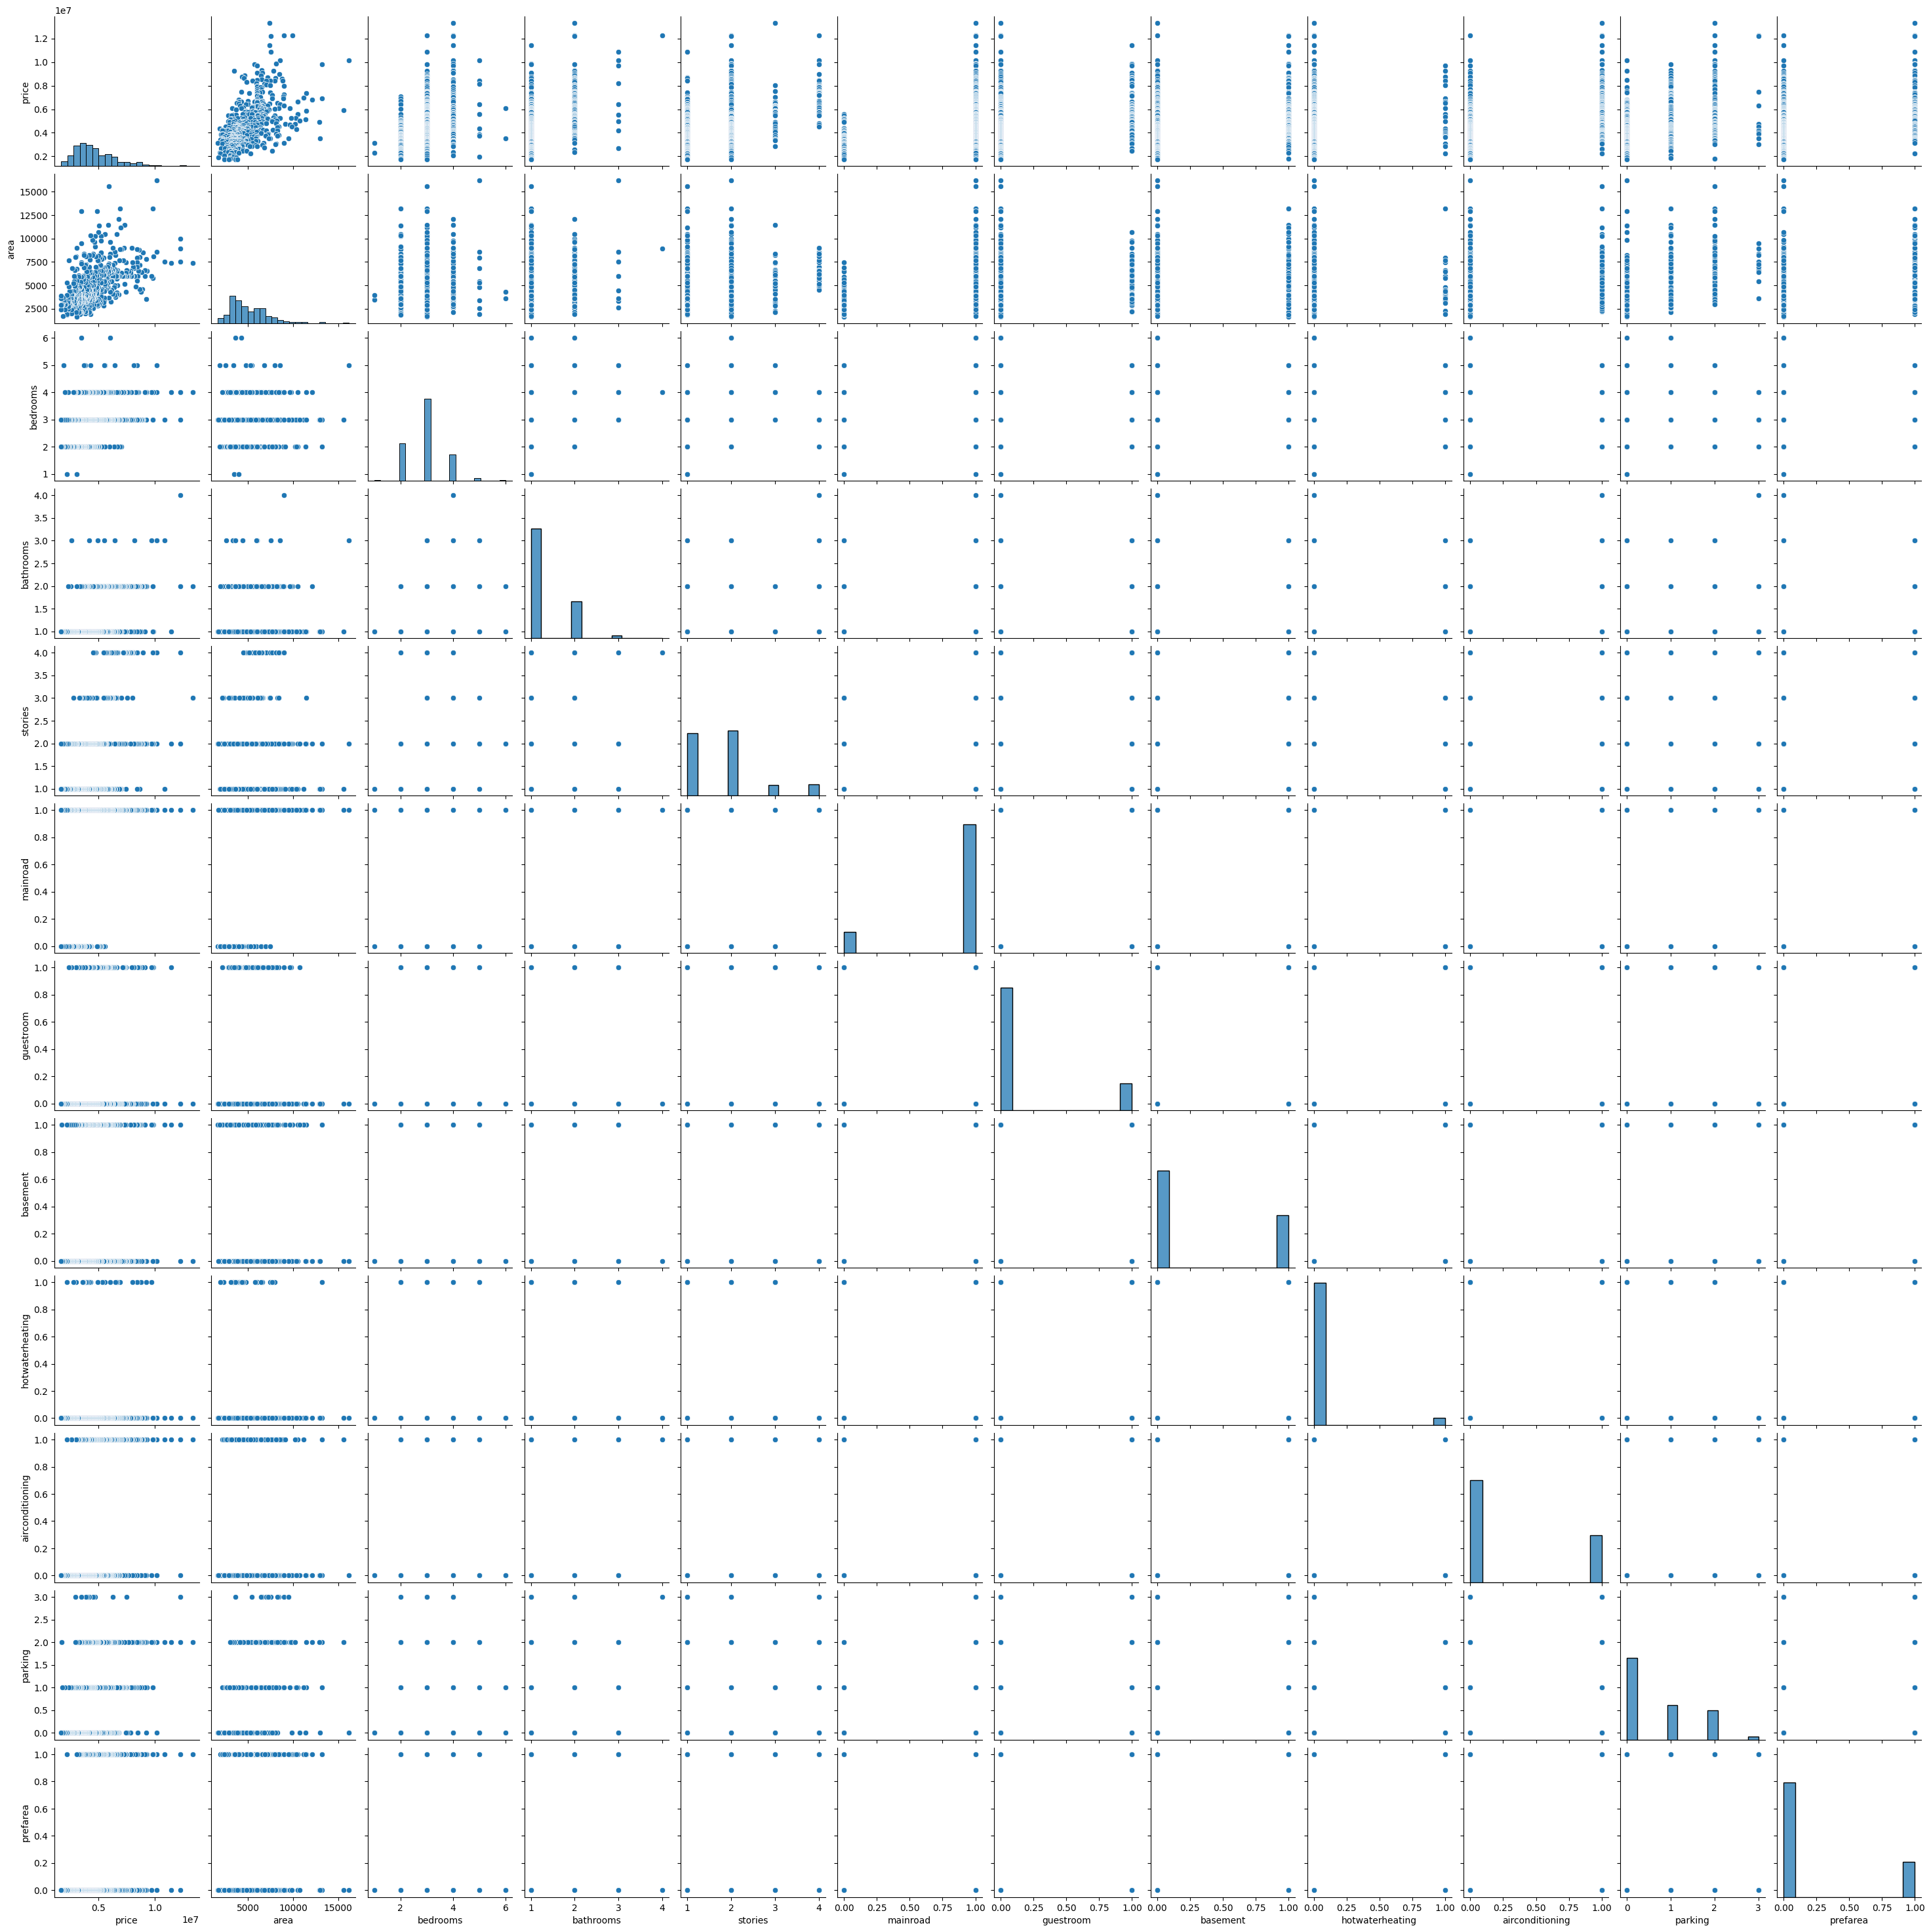

In [67]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(house)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2529)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)

# y_train=scaler.fit(X_train)
#y_test=scaler.fit(X_test)

In [69]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.490996,0.061946,-0.560884,0.230185,-2.367712,2.248456,1.394972,-0.219265,1.461742,-0.799683,-0.563223
1,1.375635,0.061946,-0.560884,-0.923387,0.422349,2.248456,1.394972,-0.219265,1.461742,1.486623,1.775495
2,0.324012,0.061946,1.427291,2.537330,0.422349,-0.444750,-0.716860,-0.219265,1.461742,-0.799683,-0.563223
3,-1.057438,0.061946,-0.560884,-0.923387,-2.367712,-0.444750,-0.716860,-0.219265,-0.684115,-0.799683,-0.563223
4,1.853645,0.061946,-0.560884,-0.923387,0.422349,-0.444750,1.394972,-0.219265,-0.684115,0.343470,1.775495
...,...,...,...,...,...,...,...,...,...,...,...
431,1.495137,0.061946,1.427291,1.383758,0.422349,-0.444750,-0.716860,-0.219265,1.461742,-0.799683,-0.563223
432,0.802022,-1.288475,-0.560884,-0.923387,0.422349,-0.444750,-0.716860,-0.219265,-0.684115,-0.799683,-0.563223
433,-0.297401,-1.288475,-0.560884,-0.923387,0.422349,-0.444750,-0.716860,-0.219265,-0.684115,-0.799683,-0.563223
434,1.064928,-1.288475,-0.560884,-0.923387,0.422349,-0.444750,-0.716860,-0.219265,-0.684115,0.343470,-0.563223


In [46]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [47]:
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
print(regression.score(X_test, y_test))

0.6073819897650812


In [71]:
## prediction
y_pred=regression.predict(X_test)

In [72]:
regression.coef_

array([464213.97195063,  87556.19231032, 569757.75233727, 337835.94424911,
       174978.91634619, 129830.84283182, 114310.56178   , 177649.50361248,
       440954.67777641, 219795.28141929, 291429.88285705])

In [73]:
regression.intercept_

4703927.752293578

In [74]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1705779126680.6355
931968.0157848005
1306054.7946700535


In [75]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6073819897650812
0.5628582978827708


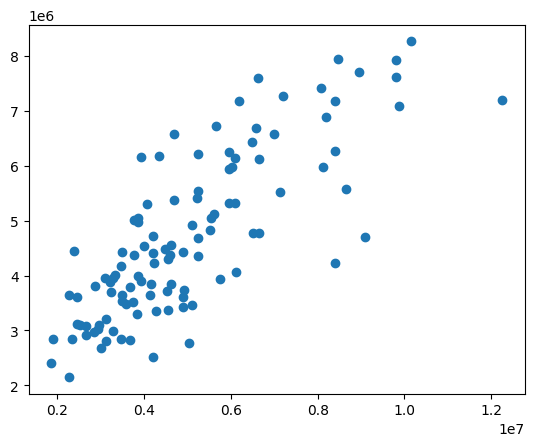

In [80]:
plt.scatter(y_test,y_pred)

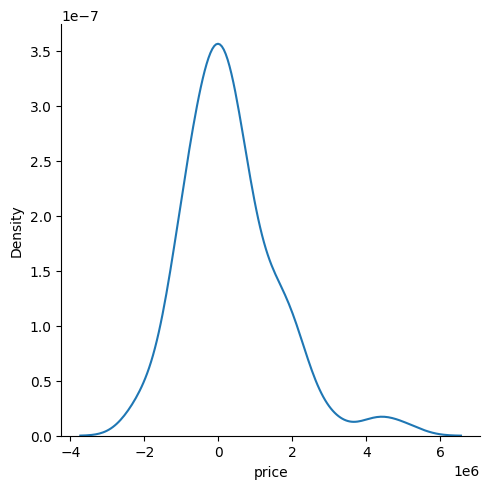

In [82]:
## Plot this residuals
sns.displot(residuals,kind='kde')

In [81]:
residuals=y_test-y_pred
print(residuals)

84     1.742116e+06
518   -6.687420e+05
226   -6.884619e+05
122    8.427748e+03
468    3.262838e+05
           ...     
64     4.303735e+05
202    1.464453e+06
475   -1.442795e+05
83    -1.005758e+05
297   -5.263068e+05
Name: price, Length: 109, dtype: float64


In [ ]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

# from sklearn.neighbors import KNeighborsRegressor
# knnr = KNeighborsRegressor()

# from sklearn.svm import SVR
# svr = SVR()

# from sklearn.tree import DecisionTreeRegressor
# dtr = DecisionTreeRegressor()

# from sklearn.ensemble import RandomForestRegressor
# rfr = RandomForestRegressor()

In [76]:
from sklearn.metrics import mean_absolute_percentage_error

In [77]:
mean_absolute_percentage_error(y_test,y_pred)

0.186167785130339

In [78]:
mean_absolute_percentage_error(y_test,y_pred)

0.186167785130339

In [79]:
mean_absolute_percentage_error(y_test,y_pred)

0.186167785130339